In [56]:
import matplotlib
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, LogFormatterMathtext
from matplotlib.pyplot import figure, axes, plot, xlabel, ylabel, title, \
grid, savefig, show

In [57]:
%matplotlib inline

In [58]:
from tools import load_nyt_database, FixedOrderFormatter

In [59]:
!ls data/NYT_new/

bicultural.json         monocultural.json       other ethnicity.json
biethnic.json           monoethnic.json         other race.json
biracial.json           monoracial.json         polycultural.json
cultural pluralism.json multicultural.json      polyculturalism.json
interracial.json        multiculturalism.json   polyethnic.json
mixed ethnicity.json    multiethnic.json        polyracial.json
mixed race.json         multiracial.json


In [60]:
database_norm = load_nyt_database()

In [63]:
def plot(words):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '-.', '--'])
    df = database_norm[words] * 100
    #df = pd.rolling_mean(database_norm[words], 10)
    df = pd.rolling_mean(df, 10)
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(df.index, df[word], next(line_types), linewidth=3,
                 color=str(i/float(len(words))))
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    #axis_1.set_ylim(1e-4, 3e-1) # You can disable
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable
    #axis_1.grid(True)

    font = {'family': "Times New Roman",
            'color': 'black',
           'size': 18}
    axis_1.set_ylabel("Percentage of New York Times Articles ($\%$)", font)
    axis_1.set_xlabel("Year", font)
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    axis_1.tick_params(axis='x', labelsize=15)
    axis_1.tick_params(axis='y', labelsize=15)
    #matplotlib.rc('ytick', labelsize=10) 
    for tick in axis_1.get_xticklabels():
        tick.set_fontname("Times New Roman")
    for tick in axis_1.get_yticklabels():
        tick.set_fontname("Times New Roman")
    plt.legend(words, loc=2,ncol=7)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


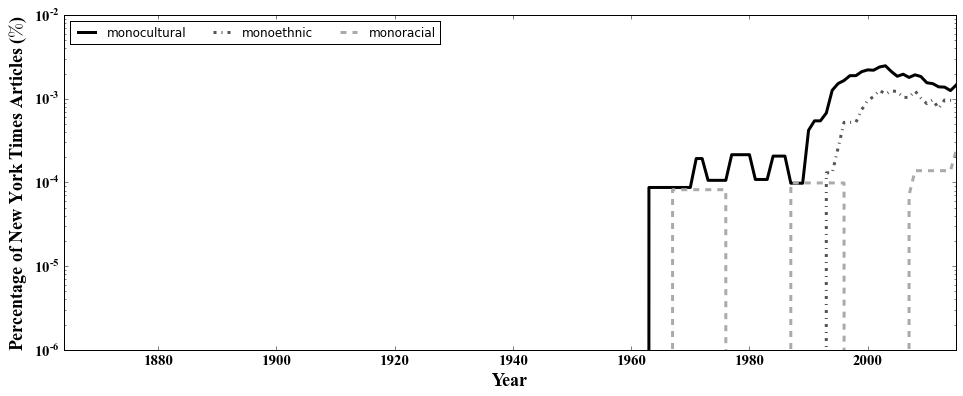

In [64]:
words = ['monocultural', 'monoethnic', 'monoracial']
plot(words)
_ = plt.xlim(1864, 2015)
_ = plt.ylim(1e-6, 1e-2)
savefig('NYT1.png')

1. monocultural--1973, 1978, 1985 
1. monoethnic -- 2008 --plateaus, increases slightly in current year. 

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


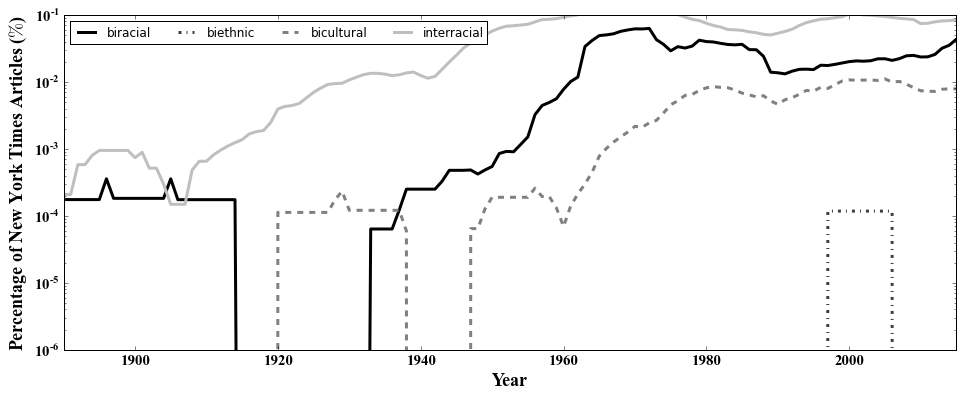

In [68]:
words = ['biracial', 'biethnic', 'bicultural', 'interracial']
plot(words)
_ = plt.xlim(1890, 2015)
_ = plt.ylim(10e-7, 10e-2)
savefig('NYT2.png')

1. bicultural: starts 1920-1940 (spike in 1930); starts again in 1950
1. biethnic: small plateau in 1995-2005

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


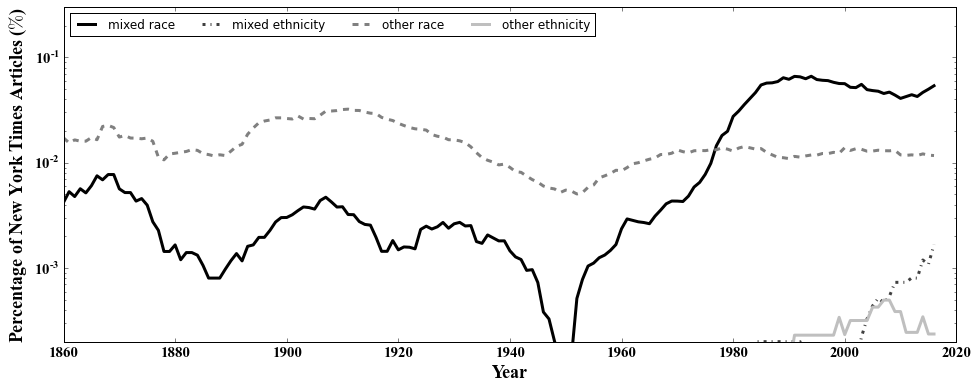

In [46]:
words = ['mixed race', 'mixed ethnicity', 'other race', 'other ethnicity']
plot(words)
_ = plt.ylim(2e-4, 3e-1)
savefig('NYT3.png')

1. mixed race: dips in 1950
1. mixed ethnicity: 1985 upward
1. other ethnicity: 1990 upward

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


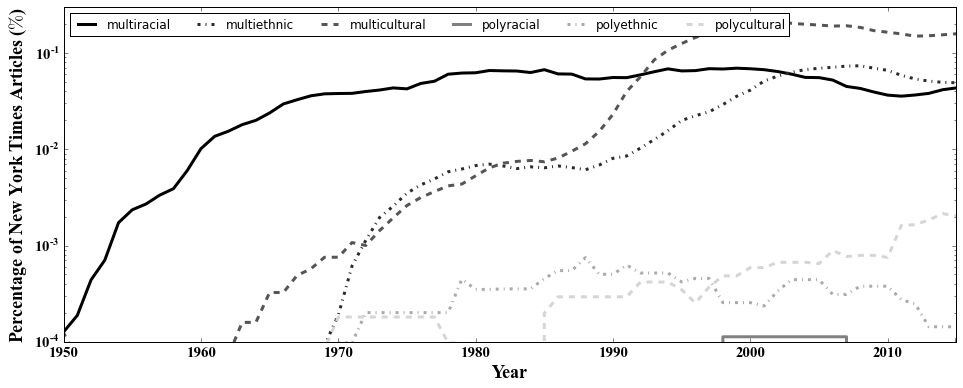

In [47]:
words = ['multiracial', 'multiethnic', 'multicultural', 'polyracial', 'polyethnic', 'polycultural']
plot(words)
_ = plt.xlim(1950, 2015)
_ = plt.ylim(1e-4, 3e-1)
savefig('NYT4.png')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


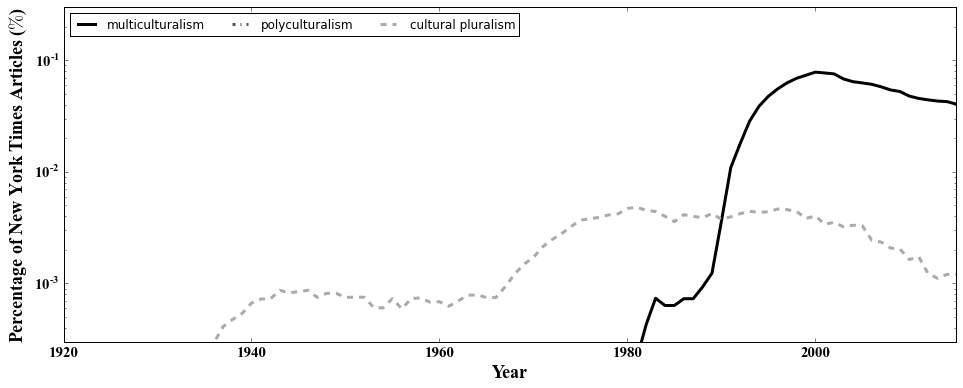

In [48]:
words = ['multiculturalism', 'polyculturalism', 'cultural pluralism']
plot(words)
_ = plt.xlim(1920, 2015)
_ = plt.ylim(3e-4, 3e-1)
savefig('NYT5.png')

polyculturalism has no frequency in NYT

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


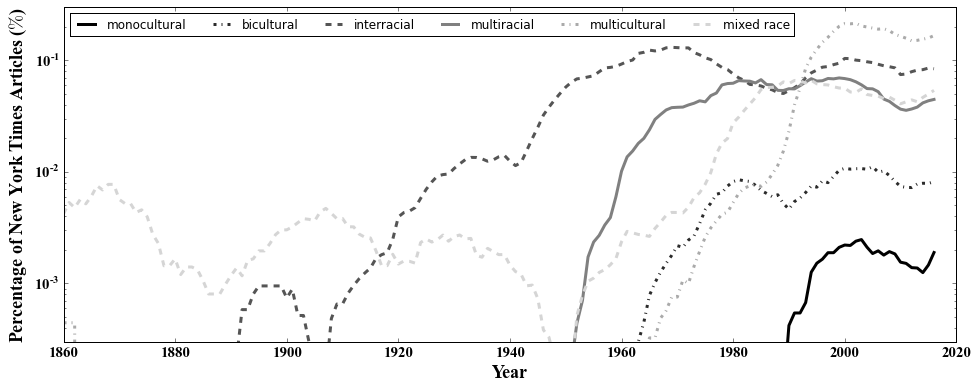

In [49]:
words = ['monocultural', 'bicultural', 'interracial','multiracial', 'multicultural','mixed race']
plot(words)
_ = plt.ylim(3e-4, 3e-1)
savefig('NYT6.png')